In [1]:
import tensorflow as tf
import keras

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(tf.__version__)
print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))

2.10.0
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
import gzip
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    data = data.reshape(-1, 28, 28)
    return data

def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

In [4]:
train_images_file = 'Data/train-images-idx3-ubyte.gz'
train_labels_file = 'Data/train-labels-idx1-ubyte.gz'
test_images_file = 'Data/t10k-images-idx3-ubyte.gz'
test_labels_file = 'Data/t10k-labels-idx1-ubyte.gz'

X_train = load_mnist_images(train_images_file)
Y_train = load_mnist_labels(train_labels_file)


X_test = load_mnist_images(test_images_file)
Y_test = load_mnist_labels(test_labels_file)

In [5]:
X_train.shape, Y_train[0]

((60000, 28, 28), 5)

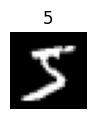

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(X_train[0], cmap='gray')
plt.title(f"{Y_train[0]}")
plt.axis('off')
plt.show()

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
def plot_images(images, labels):
    plt.figure()
    for i in range(25):
        plt.subplot(5, 5, i+1)
        idx = np.random.randint(1, images.shape[0])
        plt.imshow(images[idx], cmap='gray')
        plt.title(f"{labels[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

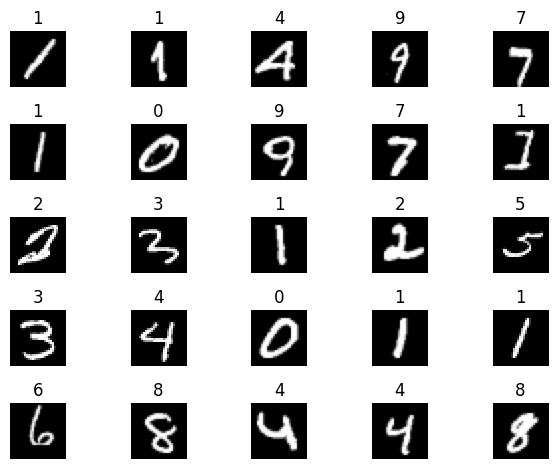

In [9]:
plot_images(images=X_train, labels=Y_train)

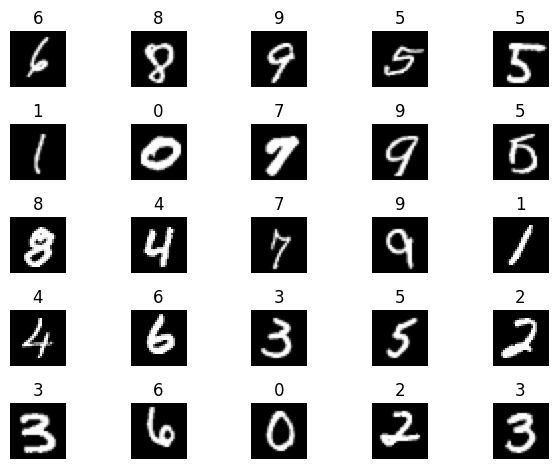

In [10]:
plot_images(images=X_test, labels=Y_test)

In [11]:
X_test.shape, Y_test.shape

((10000, 28, 28), (10000,))

In [12]:
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

In [13]:
RESHAPED  = 28*28

x_train = X_train.reshape((X_train.shape[0], RESHAPED))
x_test = X_test.reshape((X_test.shape[0], RESHAPED))

x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

y_train = Y_train
y_test = Y_test

In [14]:
x_train.shape, y_train.shape

((60000, 784), (60000,))

## Normalization

In [15]:
x_train.max(), x_test.max()

(255.0, 255.0)

In [16]:
x_train /= x_train.max()
x_test /= x_train.max()

In [17]:
x_train.shape

(60000, 784)

In [18]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [19]:
# One-hot representation of the labels.
y_train = keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = keras.utils.to_categorical(y_test, NB_CLASSES)

In [20]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Model

In [21]:
model = keras.models.Sequential(
    keras.layers.Dense(units=NB_CLASSES, input_shape=(RESHAPED,), name='Dense_layer', activation='softmax')
)

In [22]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer = 'SGD',
    metrics= ['accuracy']
)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(x_train, y_train,
         batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose= VERBOSE, validation_split=VALIDATION_SPLIT
         )

Epoch 1/200
375/375 [==============================] - 4s 3ms/step - loss: 1.3654 - accuracy: 0.6821 - val_loss: 0.8849 - val_accuracy: 0.8296
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.7852 - accuracy: 0.8292 - val_loss: 0.6534 - val_accuracy: 0.8593
Epoch 3/200
375/375 [==============================] - 1s 2ms/step - loss: 0.6397 - accuracy: 0.8503 - val_loss: 0.5600 - val_accuracy: 0.8712
Epoch 4/200
375/375 [==============================] - 1s 3ms/step - loss: 0.5690 - accuracy: 0.8601 - val_loss: 0.5078 - val_accuracy: 0.8791
Epoch 5/200
375/375 [==============================] - 1s 3ms/step - loss: 0.5258 - accuracy: 0.8682 - val_loss: 0.4741 - val_accuracy: 0.8844
Epoch 6/200
375/375 [==============================] - 1s 4ms/step - loss: 0.4960 - accuracy: 0.8734 - val_loss: 0.4502 - val_accuracy: 0.8883
Epoch 7/200
375/375 [==============================] - 1s 3ms/step - loss: 0.4739 - accuracy: 0.8772 - val_loss: 0.4324 - val_accuracy: 0.8913

Epoch 58/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3151 - accuracy: 0.9124 - val_loss: 0.3024 - val_accuracy: 0.9170
Epoch 59/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3143 - accuracy: 0.9124 - val_loss: 0.3020 - val_accuracy: 0.9167
Epoch 60/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3137 - accuracy: 0.9124 - val_loss: 0.3014 - val_accuracy: 0.9172
Epoch 61/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.9129 - val_loss: 0.3007 - val_accuracy: 0.9173
Epoch 62/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3124 - accuracy: 0.9129 - val_loss: 0.3003 - val_accuracy: 0.9172
Epoch 63/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3117 - accuracy: 0.9131 - val_loss: 0.2999 - val_accuracy: 0.9172
Epoch 64/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3111 - accuracy: 0.9131 - val_loss: 0.2994 - val_accuracy:

Epoch 115/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2910 - accuracy: 0.9195 - val_loss: 0.2849 - val_accuracy: 0.9212
Epoch 116/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2908 - accuracy: 0.9195 - val_loss: 0.2847 - val_accuracy: 0.9211
Epoch 117/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2905 - accuracy: 0.9196 - val_loss: 0.2845 - val_accuracy: 0.9214
Epoch 118/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2903 - accuracy: 0.9196 - val_loss: 0.2845 - val_accuracy: 0.9208
Epoch 119/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2900 - accuracy: 0.9193 - val_loss: 0.2841 - val_accuracy: 0.9213
Epoch 120/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2898 - accuracy: 0.9197 - val_loss: 0.2840 - val_accuracy: 0.9210
Epoch 121/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2895 - accuracy: 0.9196 - val_loss: 0.2839 - val_ac

375/375 [==============================] - 1s 3ms/step - loss: 0.2800 - accuracy: 0.9224 - val_loss: 0.2778 - val_accuracy: 0.9233
Epoch 172/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2799 - accuracy: 0.9223 - val_loss: 0.2777 - val_accuracy: 0.9235
Epoch 173/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2797 - accuracy: 0.9220 - val_loss: 0.2776 - val_accuracy: 0.9225
Epoch 174/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2796 - accuracy: 0.9221 - val_loss: 0.2775 - val_accuracy: 0.9228
Epoch 175/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2794 - accuracy: 0.9225 - val_loss: 0.2774 - val_accuracy: 0.9231
Epoch 176/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2793 - accuracy: 0.9225 - val_loss: 0.2773 - val_accuracy: 0.9233
Epoch 177/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2792 - accuracy: 0.9225 - val_loss: 0.2772 - val_accuracy: 0.9233

In [25]:
#Evaluate the model
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 57.1602 - accuracy: 0.8894


[57.16023254394531, 0.8894000053405762]

In [26]:
test_loss, test_acc = model.evaluate(x_test, y_test)

test_loss, test_acc

313/313 [==============================] - 1s 3ms/step - loss: 57.1602 - accuracy: 0.8894


(57.16023254394531, 0.8894000053405762)

# Improving the simple net in tensorflow hidden layers

In [27]:
# Network and training.
EPOCHS = 50

In [28]:
model1 = keras.models.Sequential([
    keras.layers.Dense(units=N_HIDDEN, input_shape=(RESHAPED,), activation='relu'),
    keras.layers.Dense(units=N_HIDDEN, activation='relu'),
    keras.layers.Dense(units=NB_CLASSES, activation='softmax')
])

In [29]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [30]:
model1.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])

In [31]:
history1 = model1.fit(x_train, y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 3s 4ms/step - loss: 1.4112 - accuracy: 0.6426 - val_loss: 0.7173 - val_accuracy: 0.8418
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5802 - accuracy: 0.8551 - val_loss: 0.4511 - val_accuracy: 0.8820
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4358 - accuracy: 0.8828 - val_loss: 0.3771 - val_accuracy: 0.8957
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3808 - accuracy: 0.8947 - val_loss: 0.3415 - val_accuracy: 0.9040
Epoch 5/50
375/375 [==============================] - 1s 4ms/step - loss: 0.3491 - accuracy: 0.9019 - val_loss: 0.3187 - val_accuracy: 0.9097
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3267 - accuracy: 0.9085 - val_loss: 0.3010 - val_accuracy: 0.9156
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3093 - accuracy: 0.9134 - val_loss: 0.2864 - val_accuracy: 0.9187
Epoch 

In [32]:
model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 18.3922 - accuracy: 0.9619


[18.392223358154297, 0.961899995803833]

In [33]:
def plot_prediction(features, labels, model):
    y_hat = model.predict(features) 
    plt.figure()
    for i in range(36):
        plt.subplot(6, 6, i+1)
        idx = np.random.randint(0, features.shape[0])
        image = features[idx].reshape((28, 28))
        plt.imshow(image, cmap='gray')
        plt.title(f"{np.argmax(labels[idx])} ----> {np.argmax(y_hat[idx])}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [34]:
y_test[0].tolist().index(1.0)

7

313/313 [==============================] - 1s 1ms/step


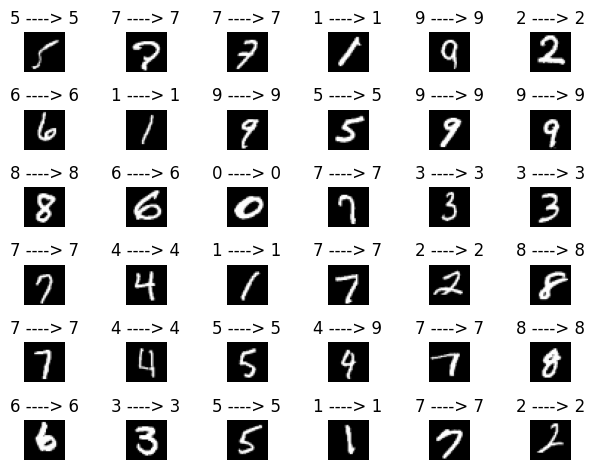

In [35]:
plot_prediction(x_test, y_test, model1)

In [36]:
model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## History plotting

In [37]:
def plot_history_loss(history, param_1 = "loss", param_2 = "val_loss", name = "Loss History"):
    plt.plot(history.history[param_1], label = "Losses")
    plt.plot(history.history[param_2], label = "Validation Losses")
                        
    plt.title(name)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    
def plot_history_metric(history, param_1 = "accuracy", param_2 = "val_accuracy", name = "Metric Hystory"):
    plt.plot(history.history[param_1], label = "Accuracy")
    plt.plot(history.history[param_2], label = "Validation Accuracy")
                        
    plt.title(name)
    plt.xlabel("Epoch")
    plt.ylabel("metric")
    plt.legend()

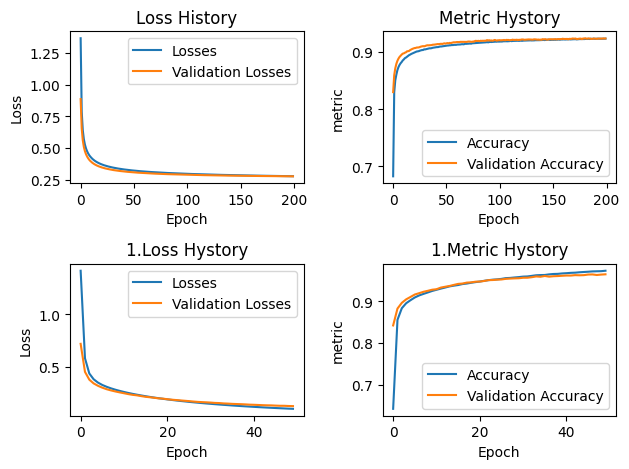

In [38]:
plt.subplot(2, 2, 1)
plot_history_loss(history)
plt.subplot(2, 2, 2)
plot_history_metric(history)

plt.subplot(2, 2, 3)
plot_history_loss(history1, name = "1.Loss Hystory")
plt.subplot(2, 2, 4)
plot_history_metric(history1, name = "1.Metric Hystory")

plt.tight_layout()
plt.show()

## Further improving the simple net in TensorFlow with dropout

In [39]:
EPOCHS = 200
BATCH_SIZE = 128
NB_CLASSES = 10
N_HIDDEN = 128
VERBOSE = 1
VALIDATION_SPLIT = 0.2
DROPOUT = 0.3

In [40]:
model2 = tf.keras.models.Sequential()
model2.add(keras.layers.Dense(N_HIDDEN,
              input_shape=(RESHAPED,),
              name='dense_layer', activation='relu'))
model2.add(keras.layers.Dropout(DROPOUT))
model2.add(keras.layers.Dense(N_HIDDEN,
              name='dense_layer_2', activation='relu'))
model2.add(keras.layers.Dropout(DROPOUT))
model2.add(keras.layers.Dense(NB_CLASSES,
              name='dense_layer_3', activation='softmax'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [41]:
model2.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [42]:
history2 = model.fit(x_train, y_train,
                    batch_size=BATCH_SIZE, epochs=EPOCHS,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2760 - accuracy: 0.9234 - val_loss: 0.2753 - val_accuracy: 0.9237
Epoch 2/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2759 - accuracy: 0.9233 - val_loss: 0.2753 - val_accuracy: 0.9237
Epoch 3/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2758 - accuracy: 0.9234 - val_loss: 0.2753 - val_accuracy: 0.9236
Epoch 4/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2756 - accuracy: 0.9233 - val_loss: 0.2752 - val_accuracy: 0.9236
Epoch 5/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2755 - accuracy: 0.9236 - val_loss: 0.2751 - val_accuracy: 0.9237
Epoch 6/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2754 - accuracy: 0.9235 - val_loss: 0.2751 - val_accuracy: 0.9237
Epoch 7/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2753 - accuracy: 0.9236 - val_loss: 0.2750 - val_accuracy: 0.9237

Epoch 58/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2702 - accuracy: 0.9246 - val_loss: 0.2722 - val_accuracy: 0.9243
Epoch 59/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2701 - accuracy: 0.9250 - val_loss: 0.2723 - val_accuracy: 0.9243
Epoch 60/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2700 - accuracy: 0.9249 - val_loss: 0.2721 - val_accuracy: 0.9247
Epoch 61/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2699 - accuracy: 0.9247 - val_loss: 0.2721 - val_accuracy: 0.9248
Epoch 62/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2699 - accuracy: 0.9245 - val_loss: 0.2721 - val_accuracy: 0.9244
Epoch 63/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2698 - accuracy: 0.9249 - val_loss: 0.2720 - val_accuracy: 0.9243
Epoch 64/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2697 - accuracy: 0.9247 - val_loss: 0.2720 - val_accuracy:

Epoch 115/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2659 - accuracy: 0.9256 - val_loss: 0.2703 - val_accuracy: 0.9249
Epoch 116/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2659 - accuracy: 0.9259 - val_loss: 0.2702 - val_accuracy: 0.9253
Epoch 117/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2657 - accuracy: 0.9257 - val_loss: 0.2703 - val_accuracy: 0.9252
Epoch 118/200
375/375 [==============================] - 1s 4ms/step - loss: 0.2658 - accuracy: 0.9260 - val_loss: 0.2702 - val_accuracy: 0.9253
Epoch 119/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2657 - accuracy: 0.9258 - val_loss: 0.2702 - val_accuracy: 0.9249
Epoch 120/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2656 - accuracy: 0.9257 - val_loss: 0.2702 - val_accuracy: 0.9248
Epoch 121/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2655 - accuracy: 0.9260 - val_loss: 0.2701 - val_ac

375/375 [==============================] - 1s 3ms/step - loss: 0.2626 - accuracy: 0.9267 - val_loss: 0.2689 - val_accuracy: 0.9260
Epoch 172/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2625 - accuracy: 0.9265 - val_loss: 0.2689 - val_accuracy: 0.9260
Epoch 173/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2625 - accuracy: 0.9268 - val_loss: 0.2689 - val_accuracy: 0.9262
Epoch 174/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2624 - accuracy: 0.9267 - val_loss: 0.2688 - val_accuracy: 0.9258
Epoch 175/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2624 - accuracy: 0.9268 - val_loss: 0.2688 - val_accuracy: 0.9260
Epoch 176/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2623 - accuracy: 0.9268 - val_loss: 0.2688 - val_accuracy: 0.9262
Epoch 177/200
375/375 [==============================] - 1s 3ms/step - loss: 0.2623 - accuracy: 0.9268 - val_loss: 0.2687 - val_accuracy: 0.9257

313/313 [==============================] - 0s 1ms/step


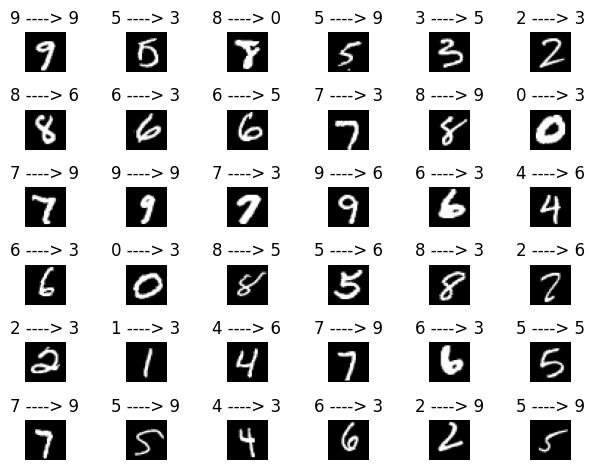

In [43]:
plot_prediction(x_test, y_test, model2)

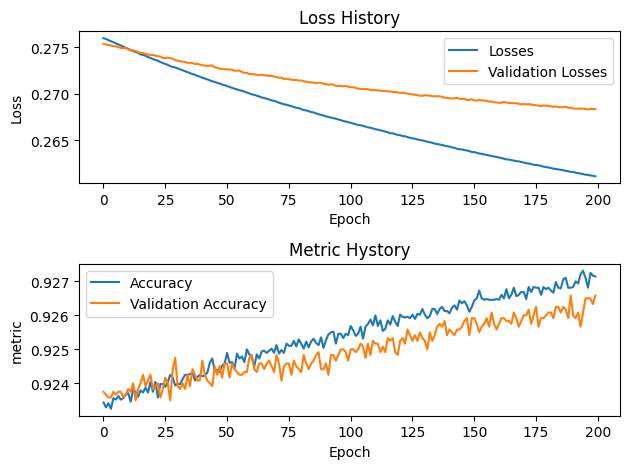

In [44]:
plt.subplot(2, 1, 1)
plot_history_loss(history2)
plt.subplot(2, 1, 2)
plot_history_metric(history2)

plt.tight_layout()
plt.show()

## Example

In [45]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
# Network and training.
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 128*2
VALIDATION_SPLIT = 0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
# Loading MNIST dataset.

# Labels have one-hot representation.
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# X_train is 60000 rows of 28x28 values; we reshape it to 60000 x 784.
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize inputs within [0, 1].
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# One-hot representations for labels.
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)
# Building the model.
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
              input_shape=(RESHAPED,),
              name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
              name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
              name='dense_layer_3', activation='softmax'))
# Summary of the model.
model.summary()

60000 train samples
10000 test samples
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 256)               200960    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 256)               65792     
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Compiling the model.
model.compile(optimizer='SGD', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Training the model.

history = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
# Evaluating the model.
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc)

Epoch 1/200
375/375 [==============================] - 3s 6ms/step - loss: 1.6026 - accuracy: 0.5226 - val_loss: 0.7930 - val_accuracy: 0.8466
Epoch 2/200
375/375 [==============================] - 1s 4ms/step - loss: 0.7874 - accuracy: 0.7689 - val_loss: 0.4679 - val_accuracy: 0.8853
Epoch 3/200
375/375 [==============================] - 1s 4ms/step - loss: 0.5943 - accuracy: 0.8222 - val_loss: 0.3815 - val_accuracy: 0.8994
Epoch 4/200
375/375 [==============================] - 1s 4ms/step - loss: 0.5122 - accuracy: 0.8469 - val_loss: 0.3391 - val_accuracy: 0.9086
Epoch 5/200
375/375 [==============================] - 1s 3ms/step - loss: 0.4602 - accuracy: 0.8632 - val_loss: 0.3103 - val_accuracy: 0.9136
Epoch 6/200
375/375 [==============================] - 1s 3ms/step - loss: 0.4264 - accuracy: 0.8731 - val_loss: 0.2920 - val_accuracy: 0.9166
Epoch 7/200
375/375 [==============================] - 1s 3ms/step - loss: 0.3969 - accuracy: 0.8825 - val_loss: 0.2764 - val_accuracy: 0.9202

Epoch 58/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1298 - accuracy: 0.9613 - val_loss: 0.1039 - val_accuracy: 0.9688
Epoch 59/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1277 - accuracy: 0.9615 - val_loss: 0.1031 - val_accuracy: 0.9691
Epoch 60/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1257 - accuracy: 0.9622 - val_loss: 0.1021 - val_accuracy: 0.9694
Epoch 61/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1242 - accuracy: 0.9632 - val_loss: 0.1015 - val_accuracy: 0.9696
Epoch 62/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1228 - accuracy: 0.9630 - val_loss: 0.1005 - val_accuracy: 0.9696
Epoch 63/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1231 - accuracy: 0.9642 - val_loss: 0.1002 - val_accuracy: 0.9692
Epoch 64/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1222 - accuracy: 0.9631 - val_loss: 0.0999 - val_accuracy:

Epoch 115/200
375/375 [==============================] - 2s 5ms/step - loss: 0.0770 - accuracy: 0.9765 - val_loss: 0.0804 - val_accuracy: 0.9764
Epoch 116/200
375/375 [==============================] - 1s 4ms/step - loss: 0.0770 - accuracy: 0.9765 - val_loss: 0.0802 - val_accuracy: 0.9764
Epoch 117/200
375/375 [==============================] - 1s 4ms/step - loss: 0.0777 - accuracy: 0.9766 - val_loss: 0.0799 - val_accuracy: 0.9762
Epoch 118/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0738 - accuracy: 0.9777 - val_loss: 0.0799 - val_accuracy: 0.9763
Epoch 119/200
375/375 [==============================] - 2s 4ms/step - loss: 0.0756 - accuracy: 0.9772 - val_loss: 0.0799 - val_accuracy: 0.9765
Epoch 120/200
375/375 [==============================] - 2s 4ms/step - loss: 0.0730 - accuracy: 0.9782 - val_loss: 0.0793 - val_accuracy: 0.9771
Epoch 121/200
375/375 [==============================] - 1s 4ms/step - loss: 0.0737 - accuracy: 0.9776 - val_loss: 0.0795 - val_ac

375/375 [==============================] - 1s 3ms/step - loss: 0.0538 - accuracy: 0.9836 - val_loss: 0.0722 - val_accuracy: 0.9786
Epoch 172/200
375/375 [==============================] - 1s 4ms/step - loss: 0.0546 - accuracy: 0.9834 - val_loss: 0.0723 - val_accuracy: 0.9790
Epoch 173/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0540 - accuracy: 0.9836 - val_loss: 0.0721 - val_accuracy: 0.9791
Epoch 174/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0535 - accuracy: 0.9836 - val_loss: 0.0725 - val_accuracy: 0.9793
Epoch 175/200
375/375 [==============================] - 1s 3ms/step - loss: 0.0525 - accuracy: 0.9845 - val_loss: 0.0723 - val_accuracy: 0.9790
Epoch 176/200
375/375 [==============================] - 1s 4ms/step - loss: 0.0519 - accuracy: 0.9847 - val_loss: 0.0722 - val_accuracy: 0.9791
Epoch 177/200
375/375 [==============================] - 2s 4ms/step - loss: 0.0536 - accuracy: 0.9837 - val_loss: 0.0717 - val_accuracy: 0.9796

313/313 [==============================] - 0s 1ms/step


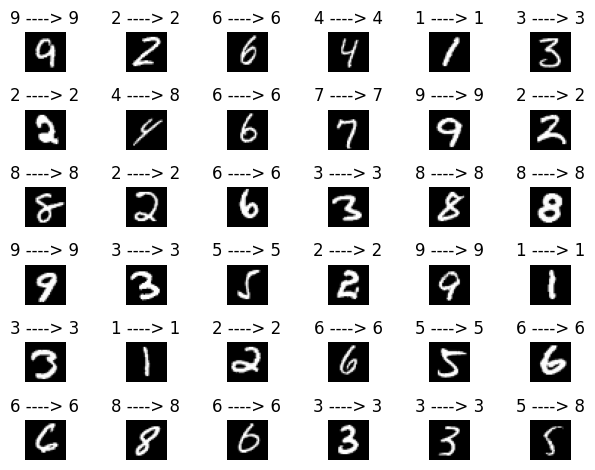

In [47]:
plot_prediction(x_test, y_test, model)

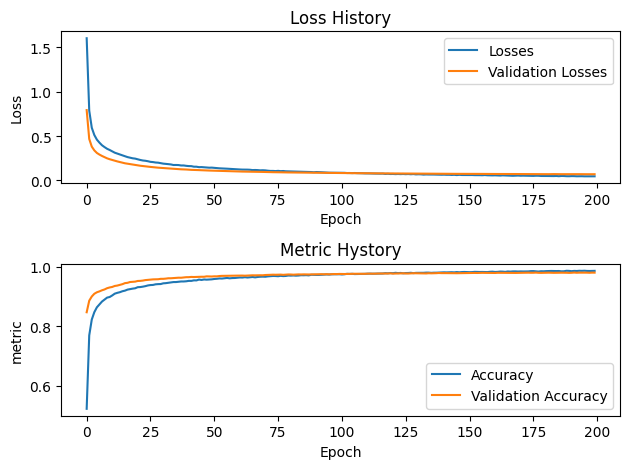

In [48]:
plt.subplot(2, 1, 1)
plot_history_loss(history)
plt.subplot(2, 1, 2)
plot_history_metric(history)

plt.tight_layout()
plt.show()

In [49]:
model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Testing different optimizers in TensorFlow

In [50]:
model.compile(optimizer="RMSProp",
             loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
EPOCHS = 250

history = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0900 - accuracy: 0.9714 - val_loss: 0.0902 - val_accuracy: 0.9758
Epoch 2/250
375/375 [==============================] - 2s 4ms/step - loss: 0.0796 - accuracy: 0.9745 - val_loss: 0.0863 - val_accuracy: 0.9769
Epoch 3/250
375/375 [==============================] - 2s 4ms/step - loss: 0.0720 - accuracy: 0.9769 - val_loss: 0.0933 - val_accuracy: 0.9754
Epoch 4/250
375/375 [==============================] - 2s 4ms/step - loss: 0.0672 - accuracy: 0.9796 - val_loss: 0.0843 - val_accuracy: 0.9778
Epoch 5/250
375/375 [==============================] - 1s 4ms/step - loss: 0.0595 - accuracy: 0.9817 - val_loss: 0.0899 - val_accuracy: 0.9783
Epoch 6/250
375/375 [==============================] - 1s 4ms/step - loss: 0.0574 - accuracy: 0.9824 - val_loss: 0.0931 - val_accuracy: 0.9783
Epoch 7/250
375/375 [==============================] - 2s 4ms/step - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.0890 - val_accuracy: 0.9783

Epoch 58/250
375/375 [==============================] - 1s 4ms/step - loss: 0.0235 - accuracy: 0.9946 - val_loss: 0.1830 - val_accuracy: 0.9811
Epoch 59/250
375/375 [==============================] - 1s 4ms/step - loss: 0.0241 - accuracy: 0.9947 - val_loss: 0.1837 - val_accuracy: 0.9814
Epoch 60/250
375/375 [==============================] - 1s 4ms/step - loss: 0.0222 - accuracy: 0.9948 - val_loss: 0.1967 - val_accuracy: 0.9796
Epoch 61/250
375/375 [==============================] - 1s 4ms/step - loss: 0.0229 - accuracy: 0.9944 - val_loss: 0.1995 - val_accuracy: 0.9811
Epoch 62/250
375/375 [==============================] - 2s 4ms/step - loss: 0.0233 - accuracy: 0.9946 - val_loss: 0.1946 - val_accuracy: 0.9813
Epoch 63/250
375/375 [==============================] - 2s 4ms/step - loss: 0.0238 - accuracy: 0.9943 - val_loss: 0.1930 - val_accuracy: 0.9816
Epoch 64/250
375/375 [==============================] - 1s 4ms/step - loss: 0.0249 - accuracy: 0.9943 - val_loss: 0.1951 - val_accuracy:

Epoch 115/250
375/375 [==============================] - 1s 4ms/step - loss: 0.0268 - accuracy: 0.9951 - val_loss: 0.2530 - val_accuracy: 0.9827
Epoch 116/250
375/375 [==============================] - 1s 4ms/step - loss: 0.0235 - accuracy: 0.9953 - val_loss: 0.2777 - val_accuracy: 0.9803
Epoch 117/250
375/375 [==============================] - 1s 4ms/step - loss: 0.0254 - accuracy: 0.9952 - val_loss: 0.2800 - val_accuracy: 0.9810
Epoch 118/250
375/375 [==============================] - 1s 4ms/step - loss: 0.0244 - accuracy: 0.9961 - val_loss: 0.2797 - val_accuracy: 0.9823
Epoch 119/250
375/375 [==============================] - 2s 4ms/step - loss: 0.0248 - accuracy: 0.9953 - val_loss: 0.2568 - val_accuracy: 0.9812
Epoch 120/250
375/375 [==============================] - 1s 4ms/step - loss: 0.0227 - accuracy: 0.9955 - val_loss: 0.2689 - val_accuracy: 0.9823
Epoch 121/250
375/375 [==============================] - 2s 4ms/step - loss: 0.0236 - accuracy: 0.9956 - val_loss: 0.2571 - val_ac

375/375 [==============================] - 2s 4ms/step - loss: 0.0297 - accuracy: 0.9955 - val_loss: 0.2877 - val_accuracy: 0.9809
Epoch 172/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0265 - accuracy: 0.9956 - val_loss: 0.3040 - val_accuracy: 0.9816
Epoch 173/250
375/375 [==============================] - 2s 4ms/step - loss: 0.0271 - accuracy: 0.9952 - val_loss: 0.3163 - val_accuracy: 0.9817
Epoch 174/250
375/375 [==============================] - 2s 4ms/step - loss: 0.0258 - accuracy: 0.9962 - val_loss: 0.3463 - val_accuracy: 0.9808
Epoch 175/250
375/375 [==============================] - 2s 4ms/step - loss: 0.0303 - accuracy: 0.9958 - val_loss: 0.3050 - val_accuracy: 0.9821
Epoch 176/250
375/375 [==============================] - 2s 4ms/step - loss: 0.0262 - accuracy: 0.9959 - val_loss: 0.3103 - val_accuracy: 0.9804
Epoch 177/250
375/375 [==============================] - 1s 4ms/step - loss: 0.0248 - accuracy: 0.9961 - val_loss: 0.3340 - val_accuracy: 0.9808

375/375 [==============================] - 2s 5ms/step - loss: 0.0267 - accuracy: 0.9961 - val_loss: 0.3552 - val_accuracy: 0.9816
Epoch 228/250
375/375 [==============================] - 2s 4ms/step - loss: 0.0253 - accuracy: 0.9962 - val_loss: 0.3606 - val_accuracy: 0.9814
Epoch 229/250
375/375 [==============================] - 1s 4ms/step - loss: 0.0270 - accuracy: 0.9963 - val_loss: 0.3565 - val_accuracy: 0.9815
Epoch 230/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0280 - accuracy: 0.9959 - val_loss: 0.3575 - val_accuracy: 0.9816
Epoch 231/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0264 - accuracy: 0.9962 - val_loss: 0.3647 - val_accuracy: 0.9818
Epoch 232/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0269 - accuracy: 0.9961 - val_loss: 0.3610 - val_accuracy: 0.9816
Epoch 233/250
375/375 [==============================] - 2s 5ms/step - loss: 0.0274 - accuracy: 0.9960 - val_loss: 0.3575 - val_accuracy: 0.9817

313/313 [==============================] - 1s 2ms/step


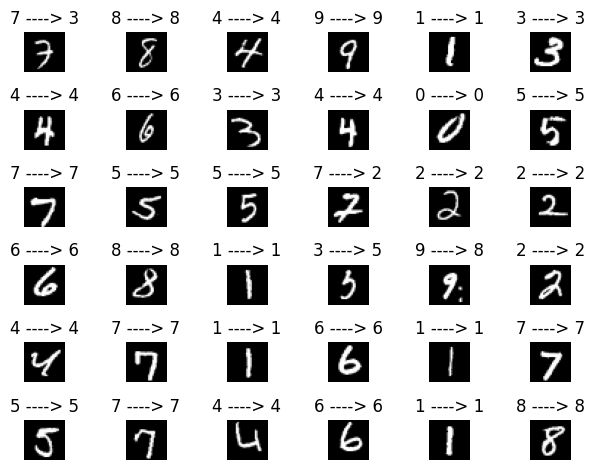

In [52]:
plot_prediction(x_test, y_test, model)

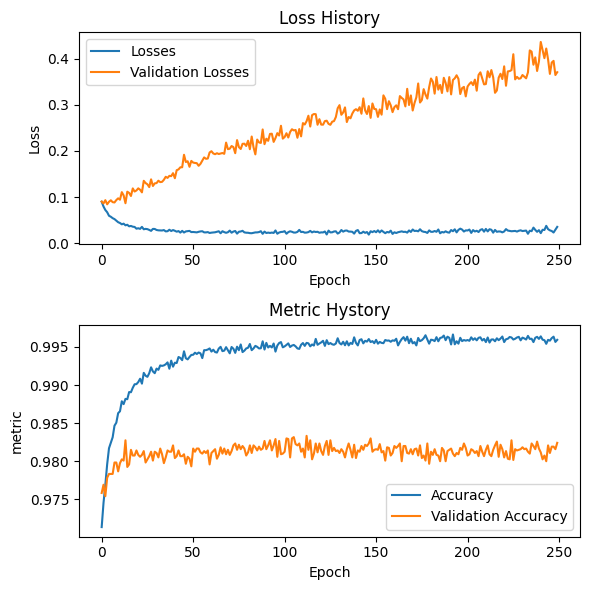

In [53]:
plt.figure(figsize=(6,6))

plt.subplot(2, 1, 1)
plot_history_loss(history)
plt.subplot(2, 1, 2)
plot_history_metric(history)

plt.tight_layout()
plt.show()

In [54]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 305.1552 - accuracy: 0.9712


[305.1552429199219, 0.9711999893188477]

In [55]:
model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [56]:
EPOCHS = 50

history = model.fit(X_train, Y_train,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0406 - accuracy: 0.9934 - val_loss: 0.3761 - val_accuracy: 0.9793
Epoch 2/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0432 - accuracy: 0.9927 - val_loss: 0.3296 - val_accuracy: 0.9790
Epoch 3/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0407 - accuracy: 0.9923 - val_loss: 0.3119 - val_accuracy: 0.9790
Epoch 4/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0425 - accuracy: 0.9922 - val_loss: 0.2717 - val_accuracy: 0.9783
Epoch 5/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0376 - accuracy: 0.9925 - val_loss: 0.2542 - val_accuracy: 0.9796
Epoch 6/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0526 - accuracy: 0.9907 - val_loss: 0.2519 - val_accuracy: 0.9800
Epoch 7/50
375/375 [==============================] - 1s 4ms/step - loss: 0.0361 - accuracy: 0.9930 - val_loss: 0.2543 - val_accuracy: 0.9798
Epoch 

In [57]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 77.1870 - accuracy: 0.9820


[77.18699645996094, 0.9819999933242798]

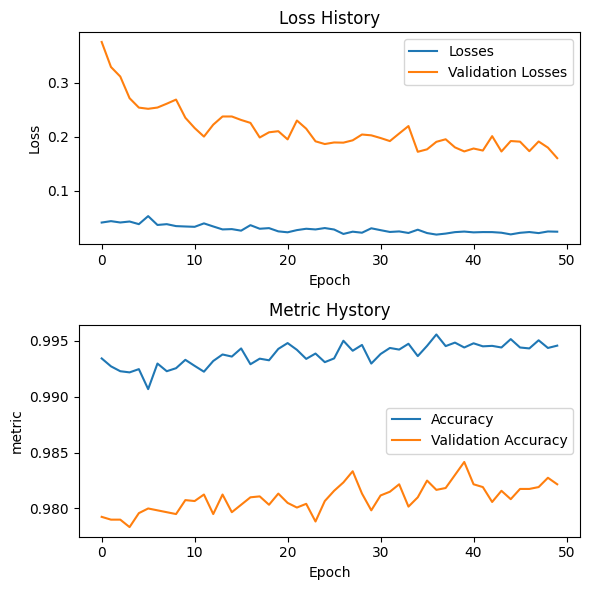

In [58]:
plt.figure(figsize=(6,6))

plt.subplot(2, 1, 1)
plot_history_loss(history)
plt.subplot(2, 1, 2)
plot_history_metric(history)

plt.tight_layout()
plt.show()